In [20]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
%matplotlib inline

In [21]:
diabetes_data = pd.read_csv('diabetes-Copy1.csv')

In [22]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Visualizations

In [24]:
def agetype_func(age):
    
    if age.item()<40:
        return 'Young'
    elif age.item()>=40 and age.item()<50:
        return 'Middle aged (40-50)' 
    elif age.item()>=50 and age.item()<60:
        return 'Middle aged(50-60)'
    else:
        return 'Old(>60)'
diabetes_data['AgeType'] = diabetes_data[['Age']].apply(agetype_func, axis=1)

In [25]:
def diabetes_stat(yes):
    if yes.item()==1:
        return 'Yes'
    else:
        return 'No' 
diabetes_data['Diabetes'] = diabetes_data[['Outcome']].apply(diabetes_stat, axis=1)

In [35]:
def bmi_func(bmi):
    
    if bmi.item()<18.5:
        return 'Underweight'
    elif bmi.item()>=18.5 and bmi.item()<25:
        return 'Normal Weight' 
    elif bmi.item()>=25 and bmi.item()<30:
        return 'Overweight'
    else:
        return 'Obese'
diabetes_data['bmiType'] = diabetes_data[['BMI']].apply(bmi_func, axis=1)

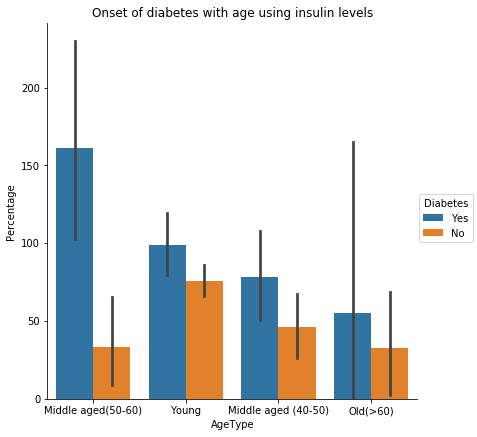

In [36]:
# How insulin affects different age groups?

# High Insulin levels is a direct indicator of diabetes in all age groups 

mx = sns.factorplot(x="AgeType",y='Insulin', hue='Diabetes',data=diabetes_data, kind="bar", size=6)
mx.set(ylabel='Percentage ')
plt.title('Onset of diabetes with age using insulin levels');

Text(0.5,1,'Boxplot of People who can have diabetes on the basis of BMI and age ')

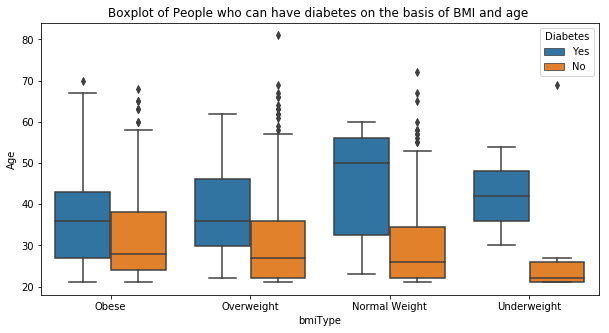

In [44]:
# Boxplot of People who can have diabetes on the basis of BMI and age
plt.figure(figsize=(10,5))
sns.boxplot('bmiType','Age', data=diabetes_data, hue="Diabetes")
plt.title('Boxplot of People who can have diabetes on the basis of BMI and age ')

Text(0.5,1,'Boxplot of People who can have diabetes on the basis of BMI and DiabetesPedigreeFunction ')

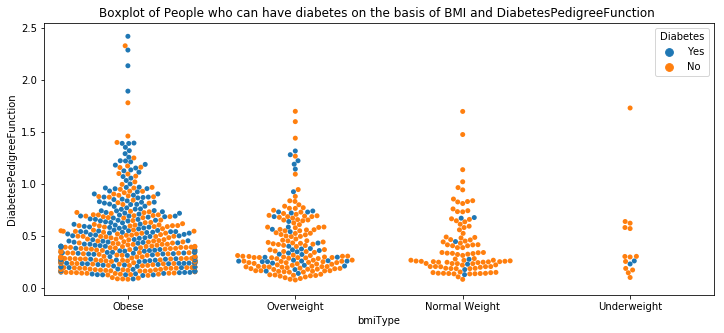

In [50]:
# Swarmplot of People who can have diabetes on the basis of BMI and DiabetesPedigreeFunction
# More number of people among the obese and overweight category have diabetes as compared to other weight froups
plt.figure(figsize=(12,5))
sns.swarmplot('bmiType','DiabetesPedigreeFunction', data=diabetes_data, hue="Diabetes")
plt.title('Boxplot of People who can have diabetes on the basis of BMI and DiabetesPedigreeFunction ')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000276BC18F550>,
      dtype=object)

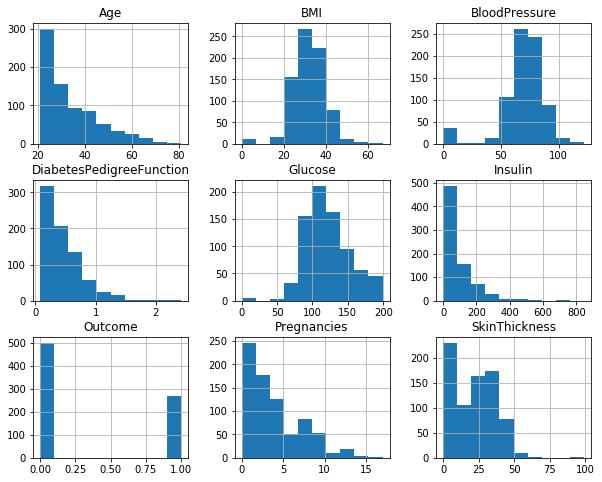

In [33]:
diabetes_data.hist(figsize=(10,8))

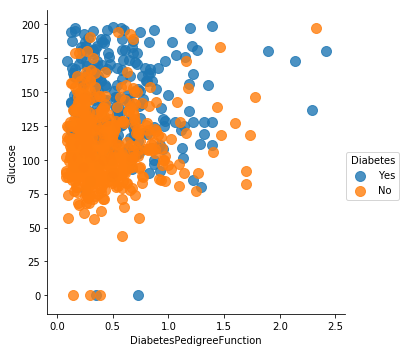

In [67]:
# Here Protime and Albumin is plot to understand its relationship to survival 
sns.lmplot('DiabetesPedigreeFunction', # Horizontal axis
           'Glucose', # Vertical axis
           data=diabetes_data, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="Diabetes", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

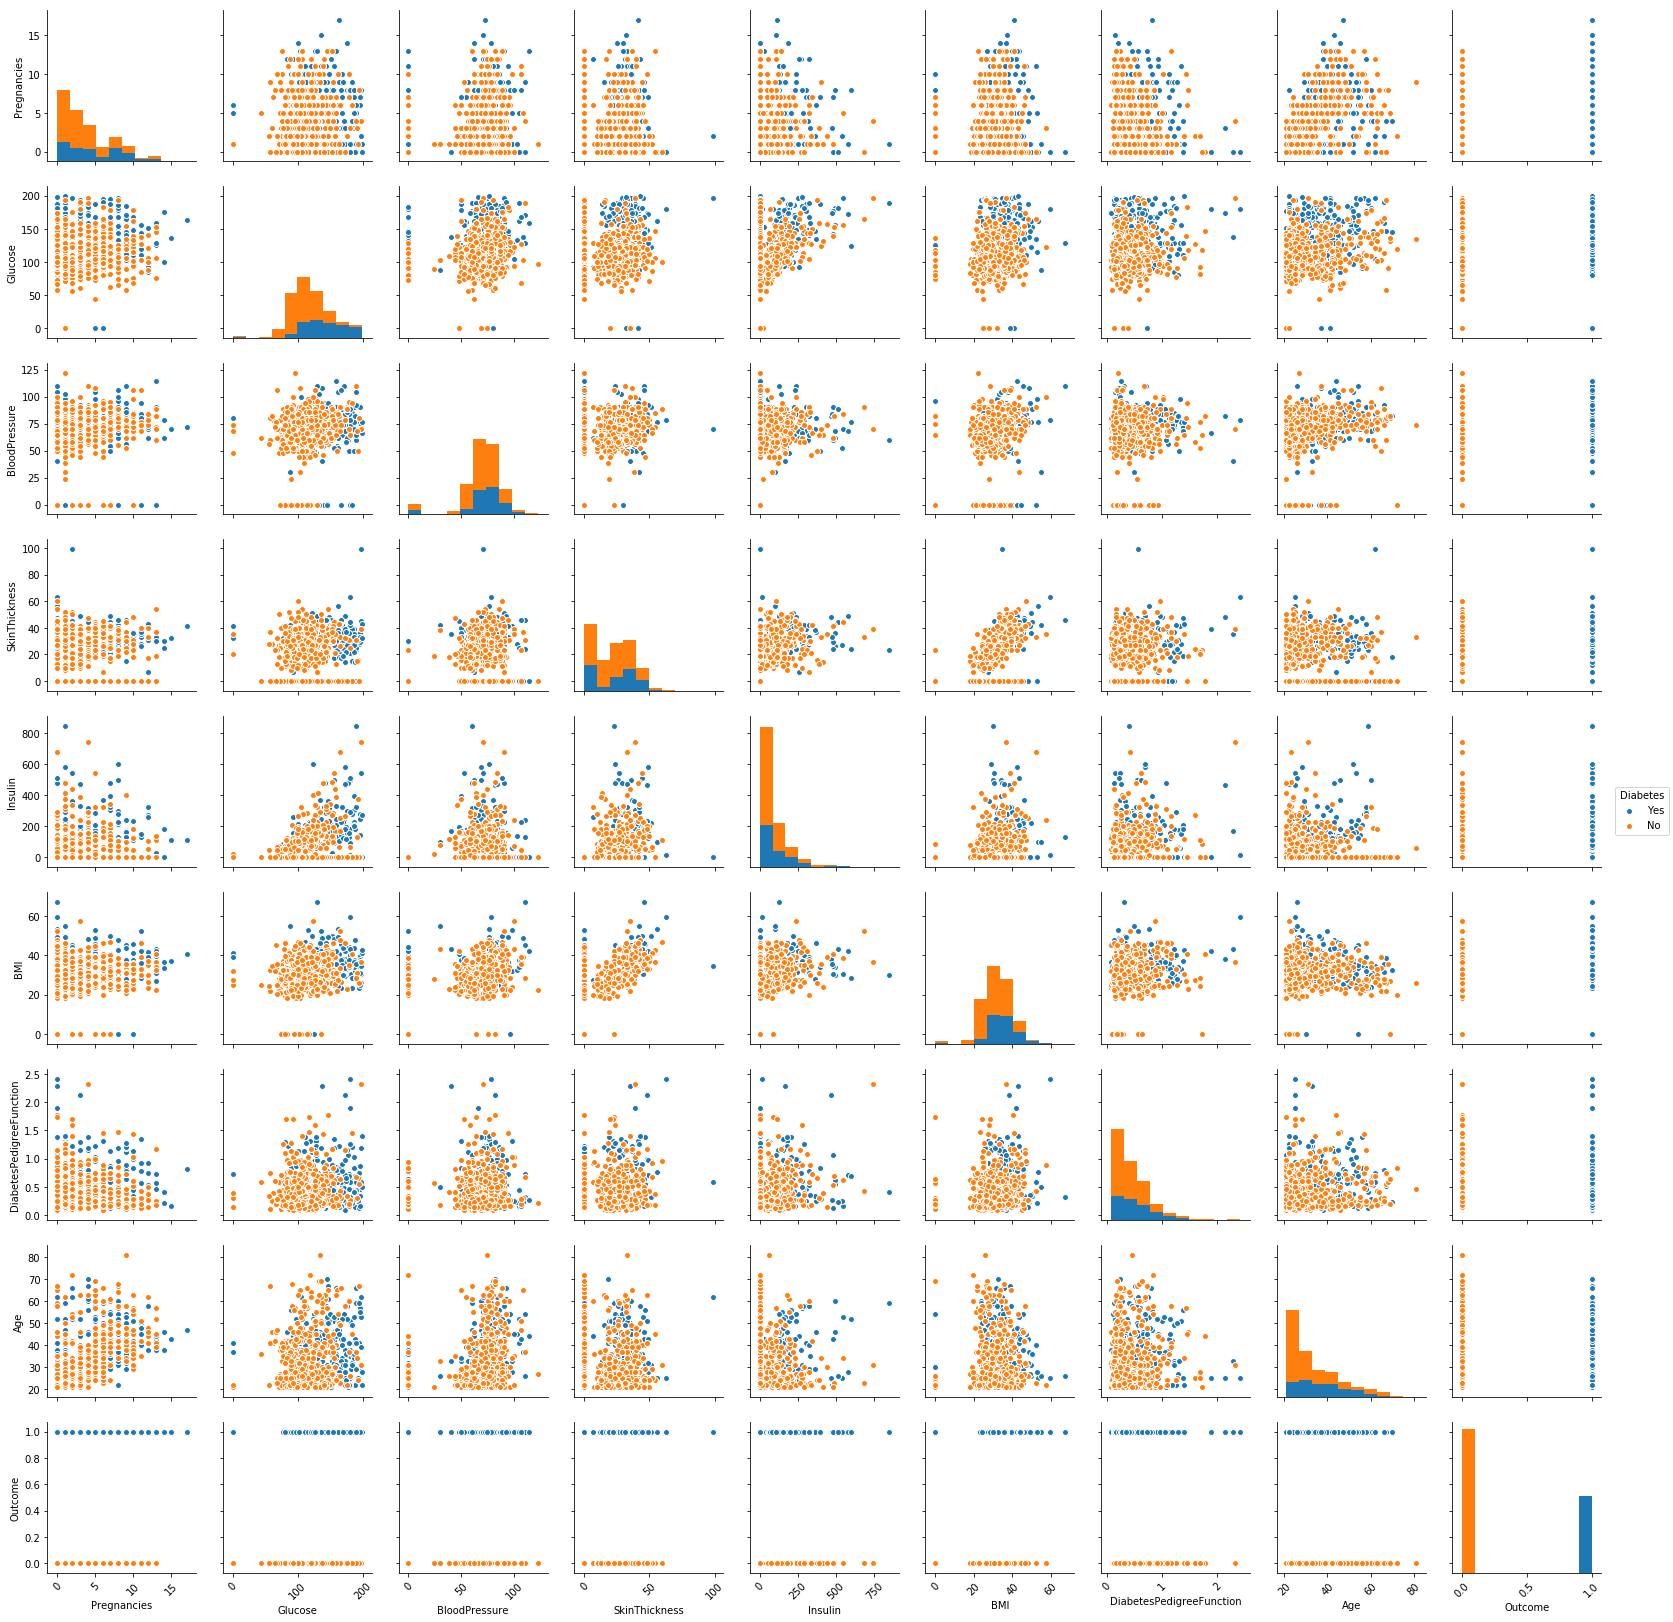

In [57]:
g = sns.pairplot(diabetes_data, diag_kind="hist",hue='Diabetes')
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

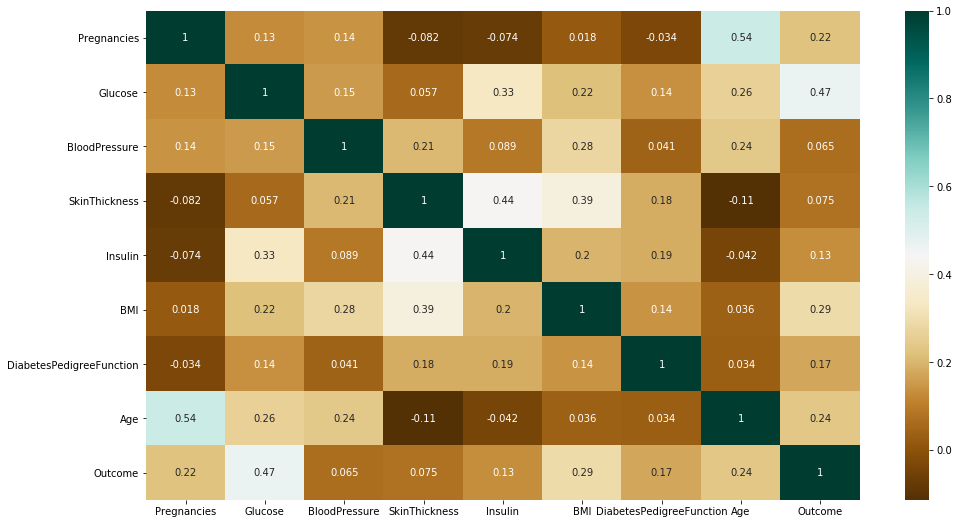

In [65]:
plt.figure(figsize=(16,9))
sns.heatmap(diabetes_data.corr(),cmap="BrBG",annot=True)

In [68]:
diabetes_data.drop(['AgeType','Diabetes','bmiType'],axis=1,inplace=True)

### Prepare the data

In [142]:
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [143]:
X = diabetes_data.drop(['Outcome'],axis=1)

y = diabetes_data.Outcome

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=23)

In [160]:
# train a logistic regression model on the training set

logreg = LogisticRegression(C=0.8)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [161]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)
# calculate accuracy with threshold of 0.5
print(metrics.accuracy_score(y_test, y_pred_class))

0.8177083333333334


In [163]:
# examine the class distribution of the testing set
y_test.value_counts()

0    126
1     66
Name: Outcome, dtype: int64

In [164]:
# calculate null accuracy 
y_test.value_counts().head(1) / len(y_test)

0    0.65625
Name: Outcome, dtype: float64

In [165]:
conf=metrics.confusion_matrix(y_test, y_pred_class)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[117   9]
 [ 26  40]]


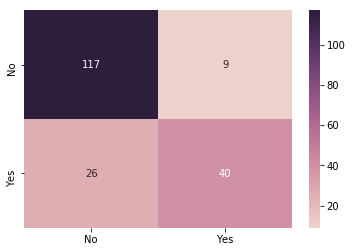

In [166]:
cmap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['No','Yes'],yticklabels=['No','Yes'],annot=True, fmt="d")

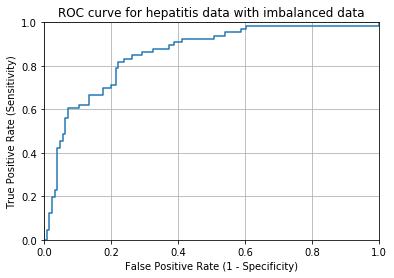

In [167]:
predict_probabilities = logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes data with imbalanced data')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [168]:
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.853896


In [190]:
# train a logistic regression model on the training set

logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)


In [191]:
conf=metrics.confusion_matrix(y_test, y_pred_class)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[98 28]
 [15 51]]


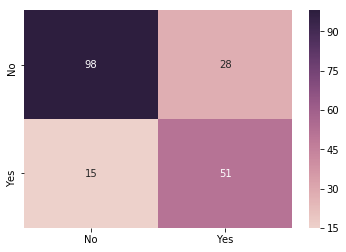

In [192]:
cmap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['No','Yes'],yticklabels=['No','Yes'],annot=True, fmt="d")

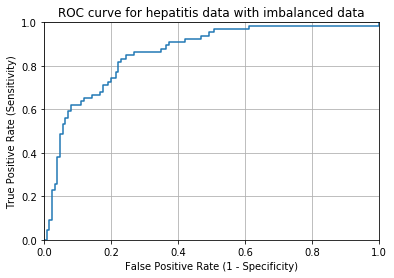

In [193]:
predict_probabilities = logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes data with imbalanced data')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [194]:
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.859067


In [195]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [196]:
y_predict = knn.predict(X_test)

In [197]:
print(metrics.accuracy_score(y_test,y_predict))
conf=metrics.confusion_matrix(y_test, y_predict)
print(metrics.confusion_matrix(y_test, y_predict))

0.7552083333333334
[[114  12]
 [ 35  31]]


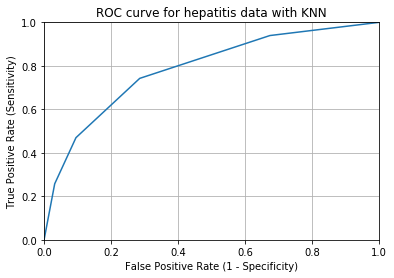

In [198]:
predict_probabilities = knn.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes data with KNN')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [199]:
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.785173
